### Basic example on the MNIST data set

In [1]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 90.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 795.4/795.4 kB 69.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 90.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [streamlit_drawable_canvas]t_drawable_canvas]


In [2]:
from src.EasyNN import FeedForwardNeuralNetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder

In [23]:
# example with MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')

X = X / 255.0 # must normalize pixels

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# one hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))


x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train_onehot)

# for accuracy score
y_test_labels = y_test.astype(int)

In [24]:
# init the model and the layers and train it (lr == 0.001, 50 epochs)
model = FeedForwardNeuralNetwork(x_train,y_train,"cross_entropy",0.001,50)

model.add_hidden_layer(1,128,"relu")
model.add_hidden_layer(2,64,"relu")
model.add_output_layer(10,"softmax")

loss = model.train()

Accuracy on epoch 1 :  0.8851607142857143
Loss <function cross_entropy at 0x7f9446ce5260> on epoch 1:  0.402064940656355
Accuracy on epoch 2 :  0.9395714285714286
Loss <function cross_entropy at 0x7f9446ce5260> on epoch 2:  0.204560920238571
Accuracy on epoch 3 :  0.9545892857142857
Loss <function cross_entropy at 0x7f9446ce5260> on epoch 3:  0.14982024166524927
Accuracy on epoch 4 :  0.9643035714285715
Loss <function cross_entropy at 0x7f9446ce5260> on epoch 4:  0.11711689441659996
Accuracy on epoch 5 :  0.9705892857142857
Loss <function cross_entropy at 0x7f9446ce5260> on epoch 5:  0.09743940819004446
Accuracy on epoch 6 :  0.9755357142857143
Loss <function cross_entropy at 0x7f9446ce5260> on epoch 6:  0.08154207483730933
Accuracy on epoch 7 :  0.9788928571428571
Loss <function cross_entropy at 0x7f9446ce5260> on epoch 7:  0.07018994875908123
Accuracy on epoch 8 :  0.9809107142857143
Loss <function cross_entropy at 0x7f9446ce5260> on epoch 8:  0.06147338126139355
Accuracy on epoch 9 

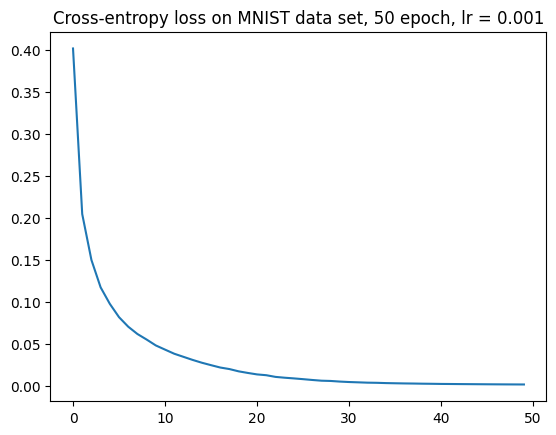

In [25]:
plt.figure()
plt.plot([i for i in range(len(loss))], loss)
plt.title("Cross-entropy loss on MNIST data set, 50 epoch, lr = 0.001")
plt.show()

In [26]:
#Accuracy on test set

pred_prob = model.predict_prob(x_test)
pred = np.array([np.argmax(p, axis=0)[0] for p in pred_prob])

accuracy = accuracy_score(y_test_labels, pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9743571428571428


In [27]:
#save the model
model.save_param("mnist_ffnn")

Weights properly saved as mnist_ffnn.pkl


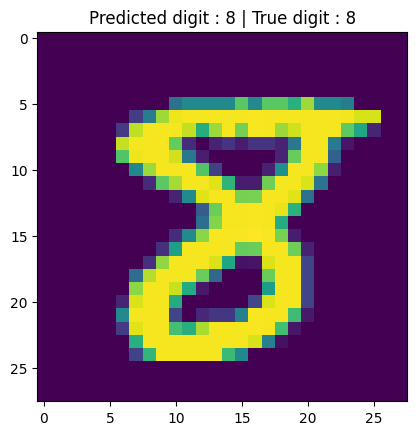

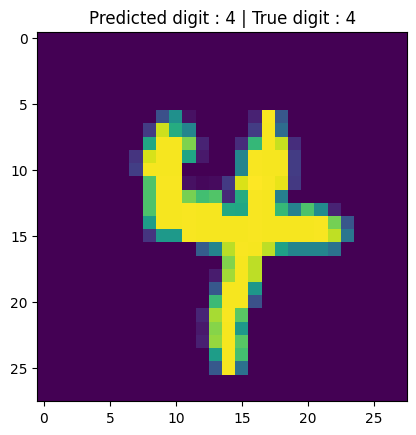

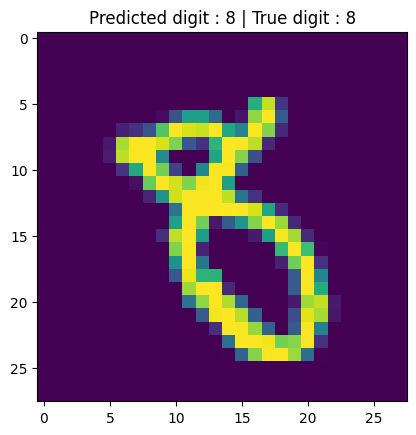

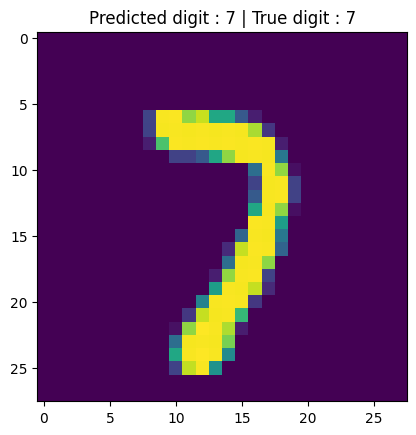

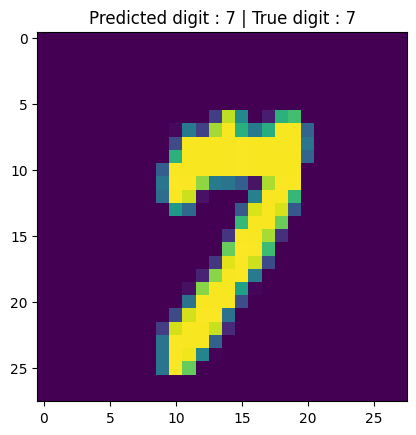

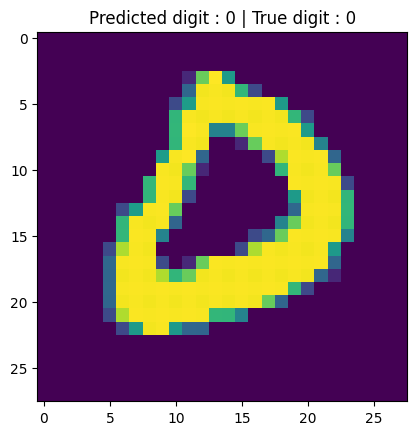

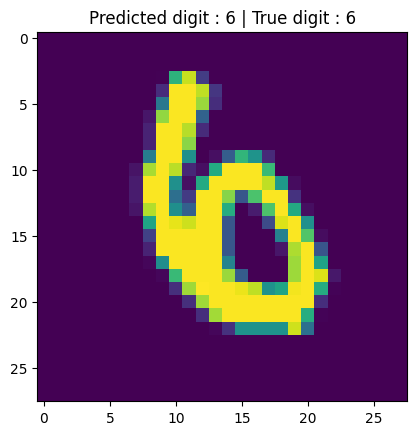

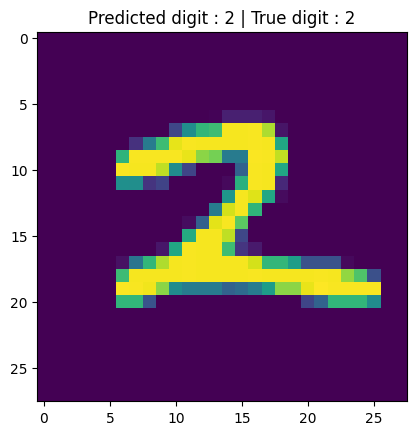

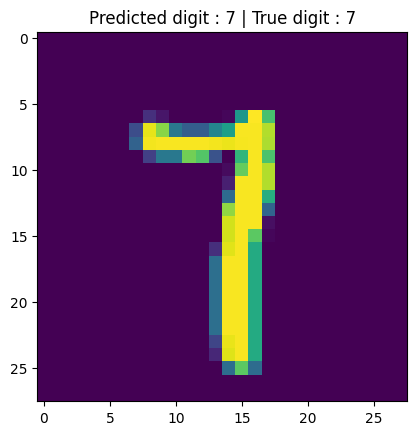

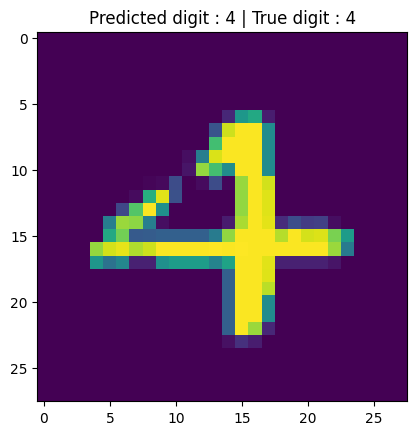

In [28]:
#Some examples
for i in range(10):
    plt.figure()
    im_true = x_test.iloc[i,:].to_numpy().reshape(28,28)
    im_pred = pred[i]
    true_digit = y_test_labels[i]

    plt.imshow(im_true)
    plt.title(f"Predicted digit : {im_pred} | True digit : {true_digit}")